In [9]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import simulate as sim
import plotting as plot
import observables as obs

# Results for the final paper
This file will contain things such as temperature or density loops so as to simulate and plot observables that give information about Argon's phase transitions

## Temperature loop for the specific heat
You may change the temperature range by changing the parameters:
- temp_init
- temp_final
- temp_step

And you should also set the other simulation parameters

In [11]:
# Input parameters
particle_num = 4*(5**3) 
dim = 3 
lattice_const = 1.5471 # [\sigma]
temperature = 5 # [\epsilon/Kb]
temperature_error = 0.1 # error in the temperature when rescaling [\epsilon/KB]
rescale_time = 0.1 # interval between rescalings

run_time = 0.8 # sqrt(mass*\sigma^2/\epsilon)
num_tsteps = 500 
algorithm_method = "verlet" # options: "verlet" or "euler"

In [7]:

temp_init = 1
temp_final = 2
temp_step = 0.2

temp_var = []
c_variation = []
c_error = []

for temperature in np.linspace(temp_init, temp_final, int((temp_final-temp_init)/temp_step)+1):
    print("Computing specific heat for temperature = ", temperature)
    try:
        init_vel = sim.init_velocity(particle_num, temperature)
        init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
        eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
        eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
        temperature_eq = sim.temperature(eq_vel)
        sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
        c, Ac_autocorr, Ac_datablock = obs.specific_heat_error("output.csv")
        c_variation.append(c)
        c_error.append(Ac_autocorr)
        temp_var.append(temperature_eq)
    except:
        print("One step was skipped")
    


Computing specific heat for temperature =  1.0
time step :     189/500 | temperature=0.94792/1.00000 (0.08738)
time step :     500/500


C:\Users\alvar\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Computing specific heat for temperature =  1.2
time step :     252/500 | temperature=1.18358/1.20000 (0.05098)
time step :     500/500
Computing specific heat for temperature =  1.4
time step :     252/500 | temperature=1.45736/1.40000 (0.06816)
time step :     500/500
Computing specific heat for temperature =  1.6
time step :     252/500 | temperature=1.55399/1.60000 (0.04275)
time step :     500/500
Computing specific heat for temperature =  1.8
time step :     252/500 | temperature=1.76774/1.80000 (0.03629)
time step :     500/500
Computing specific heat for temperature =  2.0
time step :     315/500 | temperature=2.02929/2.00000 (0.02644)
time step :     500/500


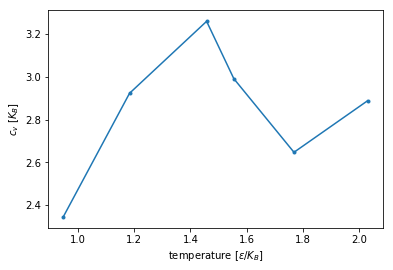

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("temperature $[\epsilon/K_B]$")
ax.set_ylabel("$c_v$ $[K_B]$")
plt.errorbar(temp_var, c_variation, yerr = c_error ,marker = ".")
plt.show()

## Serveral pair correlation functions
Here we compute three pair correlation functions corresponding to solid liquid and gaseous phases. First you may set the simulation parameters and in each of the cases the required temperature:

In [ ]:
# Input parameters
particle_num = 4*(5**3) 
dim = 3 
lattice_const = 1.5471 # [\sigma]
rescale_time = 0.1 # interval between rescalings

run_time = 0.8 # sqrt(mass*\sigma^2/\epsilon)
num_tsteps = 500 
algorithm_method = "verlet" # options: "verlet" or "euler"

In [11]:
temperature = 0.1
temperature_error = 0.01 
init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
temperature_eq = sim.temperature(eq_vel)
sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
print("CALCULATING PAIR CORRELATION FUNCTION 1...")
r1, g1, eg1, eg11 = obs.pair_correlation_function_error("output.csv", 0.01, box_length, r_max=3)
positions = np.where(eg1>0.5)
eg1[positions] = 0
g1 = g1/g1.max()
eg1 = eg1/g1.max()

time step :     441/500 | temperature=0.10124/0.10000 (0.06614)
time step :     500/500
CALCULATING PAIR CORRELATION FUNCTION 1...
Compute error (data blocking): 145/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in multiply
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Compute error (autocorrelation): 112/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:213: RuntimeWarning: invalid value encountered in double_scalars
  (np.sqrt((N-t)*(data[:n]**2).sum() - (data[:n].sum())**2) * np.sqrt((N-t)*(data[t:n+t]**2).sum() - (data[t:n+t].sum())**2))


Compute error (autocorrelation): 300/300


In [17]:
temperature = 10
temperature_error=0.5
init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
temperature_eq = sim.temperature(eq_vel)
sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
print("CALCULATING PAIR CORRELATION FUNCTION 2...")
r2, g2, eg2,eg22 = obs.pair_correlation_function_error("output.csv", 0.01, box_length, r_max=3)
positions = np.where(eg2>0.5)
eg2[positions] = 0
g2 = g2/g2.max()
eg2 = eg2/g2.max()

time step :     315/500 | temperature=9.71936/10.00000 (0.03835)
time step :     500/500
CALCULATING PAIR CORRELATION FUNCTION 2...
Compute error (data blocking): 91/300

C:\Users\alvar\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in multiply
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Compute error (autocorrelation): 86/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:213: RuntimeWarning: invalid value encountered in double_scalars
  (np.sqrt((N-t)*(data[:n]**2).sum() - (data[:n].sum())**2) * np.sqrt((N-t)*(data[t:n+t]**2).sum() - (data[t:n+t].sum())**2))


Compute error (autocorrelation): 300/300


In [18]:
temperature = 100
temperature_error = 1
init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
temperature_eq = sim.temperature(eq_vel)
sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
print("CALCULATING PAIR CORRELATION FUNCTION 3...")
r3, g3, eg3, eg33 = obs.pair_correlation_function_error("output.csv", 0.01, box_length, r_max=3)
positions = np.where(eg3>0.5)
eg3[positions] = 0
g3 = g3/g3.max()
eg3 = eg3/g3.max()

time step :     315/500 | temperature=100.53244/100.00000(0.00574)
time step :     500/500
CALCULATING PAIR CORRELATION FUNCTION 3...
Compute error (data blocking): 94/300

C:\Users\alvar\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Compute error (data blocking): 143/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in multiply
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Compute error (autocorrelation): 64/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:213: RuntimeWarning: invalid value encountered in double_scalars
  (np.sqrt((N-t)*(data[:n]**2).sum() - (data[:n].sum())**2) * np.sqrt((N-t)*(data[t:n+t]**2).sum() - (data[t:n+t].sum())**2))


Compute error (autocorrelation): 300/300


Now we just plot them one after the other:

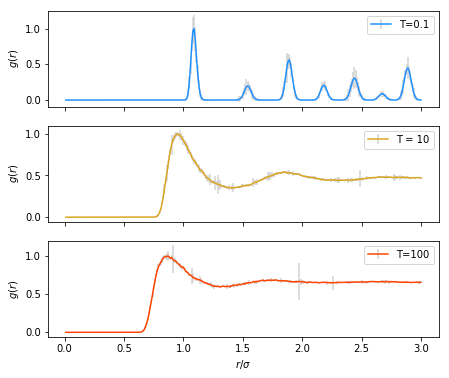

In [49]:
plt.rcParams["figure.figsize"] = [7.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.set_tight_layout(False)
ax3.set_xlabel("$r/\sigma$")
ax3.set_ylabel("$g(r)$")
ax2.set_ylabel("$g(r)$")
ax1.set_ylabel("$g(r)$")

ax1.errorbar(r1, g1, yerr=eg1, color = "dodgerblue", ecolor="lightgray", label = "T=0.1")
ax1.scatter(r1[positions],g1[positions], marker='o',color="white")

ax2.errorbar(r2, g2, yerr=eg2, color = "goldenrod",ecolor="lightgray", label = "T = 10")

ax3.errorbar(r3, g3, yerr=eg3, color = "orangered", ecolor="lightgray", label="T=100")

ax1.legend()
ax2.legend()
ax3.legend()
plt.savefig("results/W5_pair_correlation_functions_svg.svg")
plt.show()

# Timing of the program including errors 
Here we will analyse a bit the efficiency of the code, now that we have observables and its errors. First, we analyse a loop where we compute the specific heat at different temperatures.

In [27]:
def temperature_loop():
    temp_init = 1
    temp_final = 2
    temp_step = 0.2

    temp_var = []
    c_variation = []
    c_error = []

    for temperature in np.linspace(temp_init, temp_final, int((temp_final-temp_init)/temp_step)+1):
        print("Computing specific heat for temperature = ", temperature)
        try:
            init_vel = sim.init_velocity(particle_num, temperature)
            init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
            eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
            eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
            temperature_eq = sim.temperature(eq_vel)
            sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
            c, Ac_autocorr, Ac_datablock = obs.specific_heat_error("output.csv")
            c_variation.append(c)
            c_error.append(Ac_autocorr)
            temp_var.append(temperature_eq)
        except:
            print("One step was skipped")
    return temp_var,c_variation,c_error

In [5]:
%load_ext line_profiler

In [28]:
%lprun -f temperature_loop temperature_loop()

Computing specific heat for temperature =  1.0
time step :     252/500 | temperature=0.98088/1.00000 (0.07235)
time step :     500/500


C:\Users\alvar\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Computing specific heat for temperature =  1.2
time step :     252/500 | temperature=1.12170/1.20000 (0.05708)
time step :     500/500
Computing specific heat for temperature =  1.4
time step :     252/500 | temperature=1.36840/1.40000 (0.04893)
time step :     500/500
Computing specific heat for temperature =  1.6
time step :     252/500 | temperature=1.52609/1.60000 (0.03998)
time step :     500/500
Computing specific heat for temperature =  1.8
time step :     252/500 | temperature=1.73773/1.80000 (0.03027)
time step :     500/500
Computing specific heat for temperature =  2.0
time step :     315/500 | temperature=2.01215/2.00000 (0.03454)
time step :     500/500


C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in multiply
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


### Conclusions

As expected, in this function most of the time is spent in the functions sim.get_equilibrium and sim.simulate. This simulation in particular took 350 seconds, and the distibution looks like this:
- simulate: 66.1%
- get_equilibrium: 30.7%
- specific_heat_error: 3.1%
- rest: 0.1%

The simulation involves 500 particles, a duration of 0.8 with 500 timesteps. We take them to equilibrium, time evolve them and compute the specific heat 5 times. Let's say we wanted to see the evolution of the specific heat with temperature in the three phases, we might want to make 10 measurements in each one, and that would take 35 minutes, or ~12 minutes per analysed phase. We regard this as plausible, though of course optimizing simulate would reduce the time cost of it. 

An option to reduce this is compute the specific heat while doing the simulation, instead of afterwards. We could do so by placing some booleans in the simulate, that would compute some parameters calling the specific heat function inside the simulate, where we already computed some of the quantities we know. However, as computing the specific heat only requires 3% of the time, we will leave it as it is.

Another thing we could try though is to optimize the simulate function itself. That function spends most of the time computing the force acting on each particle. Thus, we tried reducing that cost by neglecting interaction between particles more than a certain distance away from each other. You still have to compute all the distances, then extract the indices of those that are far away... In the end it's not a lengthy operation due to its complexity, but due to the size of the operands, which we cannot reduce.

__Now__ we do the same for the pair correlation function.

In [29]:
def compute_a_couple_pair_correlation():
    try:
        particle_num = 4*(5**3) 
        dim = 3 
        lattice_const = 1.5471 # [\sigma]
        rescale_time = 0.1 # interval between rescalings

        run_time = 0.8 # sqrt(mass*\sigma^2/\epsilon)
        num_tsteps = 500 
        algorithm_method = "verlet" # options: "verlet" or "euler"
        temperature = 0.1
        temperature_error = 0.01 
        init_vel = sim.init_velocity(particle_num, temperature)
        init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
        eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
        eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
        temperature_eq = sim.temperature(eq_vel)
        sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
        print("CALCULATING PAIR CORRELATION FUNCTION 1...")
        r1, g1, eg1, eg11 = obs.pair_correlation_function_error("output.csv", 0.01, box_length, r_max=3)
        positions = np.where(eg1>0.5)
        eg1[positions] = 0
        g1 = g1/g1.max()
        eg1 = eg1/g1.max()
    except:
        pass
    try:
        temperature = 100
        temperature_error = 1
        init_vel = sim.init_velocity(particle_num, temperature)
        init_pos, box_length = sim.fcc_lattice(particle_num, lattice_const)
        eq_reached = sim.get_equilibrium(init_pos, init_vel, num_tsteps, run_time/num_tsteps, box_length, temperature, "output_eq.csv", method=algorithm_method, resc_thr=[temperature_error, rescale_time])
        eq_pos, eq_vel = sim.load_final_data("output_eq.csv")
        temperature_eq = sim.temperature(eq_vel)
        sim.simulate(eq_pos, eq_vel, num_tsteps, run_time/num_tsteps, box_length, "output.csv", method=algorithm_method)
        print("CALCULATING PAIR CORRELATION FUNCTION 3...")
        r3, g3, eg3, eg33 = obs.pair_correlation_function_error("output.csv", 0.01, box_length, r_max=3)
        positions = np.where(eg3>0.5)
        eg3[positions] = 0
        g3 = g3/g3.max()
        eg3 = eg3/g3.max()
    except:
        pass
    return 

In [30]:
%lprun -f compute_a_couple_pair_correlation compute_a_couple_pair_correlation()

time step :     441/500 | temperature=0.10867/0.10000 (0.09128)
time step :     500/500
CALCULATING PAIR CORRELATION FUNCTION 1...
Compute error (data blocking): 126/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in exp
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error
C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:277: RuntimeWarning: overflow encountered in multiply
  function = lambda x,a,b,c: b-c*np.exp(-a*x) # function for fitting the error


Compute error (autocorrelation): 141/300

C:\Users\alvar\Documents\TUDelft\2. Computational Physics\Project-1_abermejillo_dbedialaunetar_mserraperalta\observables.py:213: RuntimeWarning: invalid value encountered in double_scalars
  (np.sqrt((N-t)*(data[:n]**2).sum() - (data[:n].sum())**2) * np.sqrt((N-t)*(data[t:n+t]**2).sum() - (data[t:n+t].sum())**2))


Compute error (autocorrelation): 300/300
time step :     378/500 | temperature=99.89987/100.000000 (0.00618)
time step :     500/500
CALCULATING PAIR CORRELATION FUNCTION 3...
Compute error (data blocking): 94/300

C:\Users\alvar\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Compute error (autocorrelation): 300/300


### Conclusions
In this case, it was the pair_correlation_function_error the one that took the most time. This simulation took 365 seconds and the distribution was approximately:
- simulate: 20%
- get_equilibrium: 20%
- pair_correlation_function: 60%
- rest: negligible

So if we where to optimize anything in getting the pair correlation functions it would be the observable funcition itself. However, we are only running this code three times, on for each phase of Argon. So it's not worth our time to do so. 